<a href="https://colab.research.google.com/github/itstimetowin88/Final-Project-BUMK-744-/blob/main/BUMK744_Team_Assignment_2_Spring_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team Assignment 2: Marketing Analytics**





*BUMK744	Marketing Research and Analytics	Spring 2025*




Team: 4

Team members, sorted in alphabetical order by last name:

BATTLE, ASHLYNN


BOSIO, ELENA


MEHTA, NIKET


MORONEY, NICHOLAS


ZHANG, ZHANYI

By submitting this assignment, each team member acknowledges the following pledge:

"I pledge on my honor that I have not given or received any unauthorized assistance on this exam/assignment."


## Introduction

This project uses a dataset of past car sales obtained from Kaggle, containing approximately 45 observations and the following key variables: mileage, price, year, cylinders (enginge size), and mpg. These variables describe the physical and performance characteristics of each vehicle and its corresponding sale price. We focus our analysis on these core variables to better understand vehicle differentiation and pricing dynamics.

The goal of this analysis is twofold:

a) Cluster Analysis: We aim to identify natural groupings of vehicles based on mileage, model year, engine size, and fuel efficiency. By calculating the average price for each cluster, we can match vehicle types to vehicle segments, make more informed inventory decisions, and adjust the pricing of these segments.

b) Regression Analysis: We use linear regression to assess how key car features affect pricing. This will allow us to better understand price drivers and fine-tune pricing strategies to align with diverse customer needs.

Together, these insights can help the dealership improve inventory management and pricing decisions to better serve different customer segments and optimize sales performance.


---

# Analysis

#### Loading the Data

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/itstimetowin88/Final-Project-BUMK-744-/refs/heads/main/random_45_car_samples.csv"
cars = pd.read_csv(url)
cars.columns = cars.columns.str.strip().str.lower().str.replace(' ', '_')
cars.head()

,car_sold,mileage,price,year,cylinders,mpg
0,Dodge Ram 2500,196274,34995,2012,6,19
1,Ford ltd,89000,7900,1977,8,14
2,GMC Sierra 2500HD,92844,46900,2016,8,22
3,hyundai elantra,90000,800,2015,4,25
4,acura tsx,170719,6500,2006,4,25


#### Standardizing the Data
We will standardize the predictors in order to accurately compare the predictors on the same scale.

For the purposes of hierarchical clustering, standardization should be done because euclidean distance is used to cluster observations, and a standard scale is necessary to prevent larger predictors from dominating the clustering.

For the purpose of regression, standardization should be done in order to accurately compare the influence that the predictors have on the dependent variable, and a standard scale is necessary to prevent the "over-inflation" of the influence of larger predictors.


In [ ]:
# Standardize the predictors
X = cars[['mileage', 'year', 'cylinders', 'mpg']]
X_standardized = (X - X.mean()) / X.std()

# Overwrite in the original df
cars[['mileage', 'year', 'cylinders', 'mpg']] = X_standardized

print(X.mean())
print(X.std())


mileage      147382.822222
year           2006.466667
cylinders         6.711111
mpg              21.311111
dtype: float64
mileage      70057.435304
year             9.713159
cylinders        1.546583
mpg              5.030915
dtype: float64


# Method #1: Hierarchical Clustering

#### Goal: To identify the segments of our vehicles and the pricing of those segments, in order to adjust inventory and pricing of each segment.

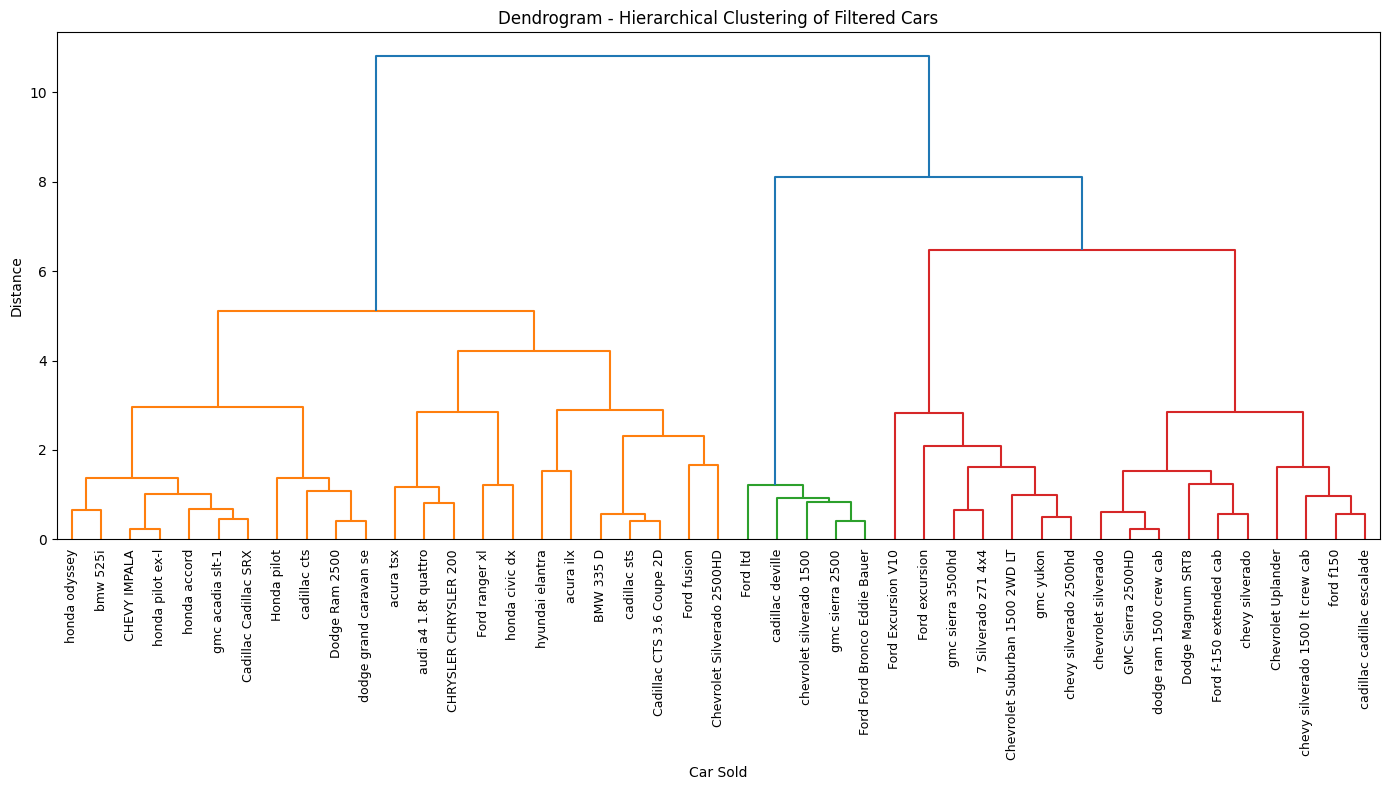

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Set 'car_sold' as index
cars.set_index('car_sold', inplace=True)

# Define the features and clean the data
features = ['mileage', 'year', 'cylinders', 'mpg']
X = cars[features].copy()

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot dendrogram with the car_sold (index) as labels
plt.figure(figsize=(14, 8))
dendrogram(Z, labels=X.index.tolist(), leaf_rotation=90, leaf_font_size=9)
plt.title("Dendrogram - Hierarchical Clustering of Filtered Cars")
plt.xlabel("Car Sold")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Assign clusters to the data
cluster_labels = fcluster(Z, t=3, criterion='maxclust')
X['bundle'] = cluster_labels

####Getting the Average Price of each Segment (cluster)

In [ ]:
# Add the cluster labels back to the original DataFrame
cars['bundle'] = X['bundle']

# Calculate the average price per cluster
average_price_per_cluster = cars.groupby('bundle')['price'].mean()

# Display the result
print(average_price_per_cluster)

bundle
1    10719.391304
2     5430.000000
3    15331.411765
Name: price, dtype: float64


##Clustering Insights

### 1. Interpreting the Clusters

There are three main clusters in our dataset. Clusters 1 and 3 capture the majority of observations. Cluster 2 is much smaller.
* Cluster 1 vehicles have mid-level pricing (Family)
* Cluster 2 vehicles have low-level pricing (Budget)
* Cluster 3 has high-level pricing (Premium)

This shows that our dealership is not targeting low-level vehicles, likely because the selling price of that segment ($5430) is so low.
###2. Takeaways

As a used car dealership, we focus on offering targeted prices that are significantly discounted compared to new car dealerships. However, with the average price of a new car trending towards nearly $50,000, ([MoneyGeek.com](https://www.moneygeek.com/resources/average-price-of-a-new-car/)), it is clear that the pricing of all our vehicle segments needs to increase.

Our premium segment, which target higher income consumers with higher quality vehicles, needs to be priced closer to the average value of a new car while still offering a strong discount. Currently, the average price of our premium segment ($15,331) is close to a 70% discount of a new car. This indicates the need for us to shift upwards the pricing levels of our three segments. This will assist us in three ways:


* Stronger pricing will drive up profit-per-sale and overall profits, in turn.
* We can begin acquiring more budget-level vehicles, because we can now sell them at a more competitive and profitable price.
* Our brand reputation will increase. Selling vehicles at a stronger value (while still remaining a discounted option compared to new cars) will portray our dealership as a seller of quality vehicles.

The best way to begin increasing our pricing is to identify what characteristics of a used car drive up pricing the most. This will help us to better identify how to categorize and price the vehicles we acquire, and thus increase the average price of our vehicle segments based on the traits of those vehicles.
In order to do this, we will perform a linear regression on the data.

# Method #2: Linear Regression

#### Goal: Identify key predictors of vehicle price, to better assign our vehicles to segments and price those vehicles better.

In [ ]:
# import the statsmodels library and the ols package in order to run the regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

# using the dataframe (that has now been standardized), model price as a function of mileage, year, cylinders, mpg
model = ols('price ~ mileage + year + cylinders + mpg', data=cars).fit()
# print the model summary in order to assess the coefficients and significance level of each dependent variable
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     6.177
Date:                Sat, 17 May 2025   Prob (F-statistic):           0.000573
Time:                        04:38:21   Log-Likelihood:                -473.46
No. Observations:                  45   AIC:                             956.9
Df Residuals:                      40   BIC:                             965.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.187e+04   1419.262      8.366      0.0

### Testing for multicollinearity between year and mileage

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



# the independent variables set
test= cars[['mileage', 'year']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = test.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(test.values, i)
                   for i in range(test.shape[1])]

print(vif_data)
print(test.corr())

   feature       VIF
0  mileage  1.000259
1     year  1.000259
          mileage      year
mileage  1.000000 -0.016103
year    -0.016103  1.000000


#### The VIF analysis shows that there is no mutlicollinearity. Thus, year and mileage can be assessed as separate variables.

## Regression Insights
### 1. Interpreting Variable Significance


*   Cylinders (engine size) is the most influential variable in determining price. An increase in standard deviation of cylinders by 1 increases the price by approximately $6293, on average.

*   Year (engine age) is the second most significant influential variable in determining price. An increase in standard deviation of year by 1 increases the price by approximately $5515, on average.

* Neither miles per gallon (mpg) nor mileage are impactful in explaining the variation in price (at a significance level of 0.1 or lower).


###2. Takeaways



*  Mileage and mpg are not important factors in driving up our car prices.

*  Newer cars with larger engine sizes will sell at our highest pricepoints.

* Older cars with smaller engine sizes will sell at our lowest pricepoints.

*  Since miles per gallon does not influence the pricepoint, this reveals an opprtunity for our dealership. Is MPG not influential due to consumer demand, or due to our pricing levels not accounting for mpg properly? If the answer is the latter, we ought to begin taking advantage of this consumer need by reflecting it in our prices. Once we adjust our pricing to better account for mpg, we can begin targeting our premium segment with high mpg vehicles, and our budget segment with low mpg cars.

* Mileage does not share multicollinearity with year, yet mileage has no significance in determining price, based on our past data. This signifies that consumers are unbothered by the mileage of a vehicle, so long as the age of the vehicle is "acceptable." Thus, we should not significantly decrease our pricing for a younger vehicle that has high mileage compared to a younger vehicle that has low mileage.



# **Conclusion**



In conclusion, this project highlights how marketing analytics techniques—specifically  hierarchical clustering and multiple linear regression—can guide strategic decisions in car dealership management. The analysis resulted in three distinct vehicle bundles: **Budget**, **Family**, and **Premium**, which align with customer needs and facilitate targeted marketing and inventory planning. Furthermore, regression modeling identified key drivers of vehicle pricing, such as engine size (cylinders) and vehicle age (year) providing valuable insights for data-driven pricing strategies.

These findings can significantly enhance managerial decision-making by segmenting inventory into clear customer-oriented bundles, enabling more efficient stocking and promotion, reducing guesswork, and aligning offerings with market demand. Price modeling supports more accurate and competitive pricing, improving profitability.

However, there are limitations to this analysis. After evaluating our insights we recognized that the dataset we chose does not capture all variables influencing consumer behavior, such as brand loyalty, warranty offers, or local market trends. Moreover, the nature of the data limits the ability to observe seasonal or temporal changes in demand. If combined with additonal data we could have explored additional clustering methods, or incorporate customer demographics and preferences to refine vehicle segmentation and pricing strategies further. However, we believe our findings identifies insigthful strategies to drive long-term business growth.




## Team cooperation

Our team collaborated effectively on the project by dividing work based on individual strengths and keeping each other informed constantly. We initiated the process with a planning session to establish goals, assign tasks, and provide internal deadlines. Throughout the project, we kept in sync using group chats, which enabled us to address any disagreements early and stay on the same page regarding progress.

Ashlynn Battle, Elena Bosio, and Niket Mehta conducted introductory and final writing and analysis. Nicholas Moroney and Zhanyi Zhang coded and interpreted the data. They were responsible for data cleaning, executing the models, and interpreting outputs to inform the team's understanding.

We decided major issues collectively, giving every team member the oppportunity to speak up about the project's direction and conclusions. Problems like technical problems or conflicting schedules were addressed effectively using flexibility and support for one another.

Generally, the project demonstrated excellent teamwork, with many members having a strong role to play in presenting a complete and coherent final product.